# Задание 
    Теперь решаем задачу регрессии - предскажем цены на недвижимость. Использовать датасет https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data (train.csv)
    Построить случайный лес, вывести важность признаков
    Обучить стекинг как минимум 3х моделей, использовать хотя бы 1 линейную модель и 1 нелинейную
    В качестве решения: Jupyter notebook с кодом, комментариями и графиками



In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 

### DATA PREPROCESSING 

In [4]:
def remove_columns(A):
    missing = {}
    removing_columns = []
    missing = A.isnull().sum().to_dict()
    total_rows = len(A.index)
    for key in missing.keys():
        if missing[key]/total_rows > 0.5:
            removing_columns.append(key)
    for key in removing_columns:   
        A = A.drop([key], axis=1)
    return A 

In [5]:
path2 = "C:\\Users\\emaxkra\\Documents\\Projects\\Australia\\Certification\\Netology\\Netology_Git\\ML\\train.csv"
c2=pd.read_csv(path2)
# Remove teh columns which are empty > 50%. Function remove_columns
data = remove_columns(c2)
data.head(30)
data = data.drop(columns = "Id")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [7]:
#Split dataset to the train and test splits
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='SalePrice'),data['SalePrice'],test_size = 0.3, random_state=1)

In [8]:
data.head(30)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [9]:
#Select the categrial features
categorials = list(data.dtypes[data.dtypes == object].index)
categorials_nunique = X_train[categorials].nunique()
data[categorials] = data[categorials].fillna('nan')

In [10]:
data.head(30)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [11]:
#Select non categorial (int and float) features
integer = integer2 = list(data.dtypes[data.dtypes != object].index)
integer.remove("SalePrice")

In [12]:
integer

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [13]:
# Create Dummy variables for categories. 
#this is to change the categories variables to bool-in 1|0
dummy_train = pd.get_dummies(X_train[categorials], columns = categorials)
dummy_test = pd.get_dummies(X_test[categorials], columns = categorials)

In [14]:
dummy_train.head(10)

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
632,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
208,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
83,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1174,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
250,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
895,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
76,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
228,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
480,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
577,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [15]:
dummy_test.head(10)

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
258,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
267,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
288,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
649,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1233,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
167,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
926,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
831,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1237,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
426,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [16]:
dummy_cols = list(set(dummy_train) & set(dummy_test))

In [17]:
dummy_train = dummy_train[dummy_cols]
dummy_test = dummy_test[dummy_cols]

In [18]:
dummy_train.head(10)

,Street_Grvl,Neighborhood_Blmngtn,GarageType_CarPort,Condition2_Feedr,BldgType_1Fam,HouseStyle_2.5Unf,GarageQual_TA,SaleCondition_Alloca,Exterior2nd_AsphShn,LotConfig_CulDSac,...,KitchenQual_Fa,Electrical_FuseA,Foundation_Slab,RoofStyle_Shed,BldgType_Duplex,BsmtFinType2_ALQ,Heating_GasW,GarageFinish_Fin,LandContour_Low,SaleType_ConLI
632,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
208,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
83,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1174,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
250,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
895,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
228,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
480,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
577,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [19]:
dummy_test.head(10)

,Street_Grvl,Neighborhood_Blmngtn,GarageType_CarPort,Condition2_Feedr,BldgType_1Fam,HouseStyle_2.5Unf,GarageQual_TA,SaleCondition_Alloca,Exterior2nd_AsphShn,LotConfig_CulDSac,...,KitchenQual_Fa,Electrical_FuseA,Foundation_Slab,RoofStyle_Shed,BldgType_Duplex,BsmtFinType2_ALQ,Heating_GasW,GarageFinish_Fin,LandContour_Low,SaleType_ConLI
258,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
267,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
288,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
649,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1233,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
167,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
926,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
831,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1237,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [20]:
# Change spaces in the integer variables to -999 to make tries work

In [21]:
X_train = pd.concat([X_train[integer].fillna(-999), dummy_train], axis = 1)
X_test = pd.concat([X_test[integer].fillna(-999), dummy_test], axis = 1)

In [22]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,KitchenQual_Fa,Electrical_FuseA,Foundation_Slab,RoofStyle_Shed,BldgType_Duplex,BsmtFinType2_ALQ,Heating_GasW,GarageFinish_Fin,LandContour_Low,SaleType_ConLI
632,20,85.0,11900,7,5,1977,1977,209.0,822,0,...,0,0,0,0,0,0,0,1,0,0
208,60,-999.0,14364,7,5,1988,1989,128.0,1065,0,...,0,0,0,0,0,0,0,1,1,0
83,20,80.0,8892,5,5,1960,1960,66.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1174,70,80.0,16560,6,8,1932,1950,0.0,503,0,...,0,0,0,0,0,0,0,0,0,0
250,30,55.0,5350,3,2,1940,1966,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [23]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,KitchenQual_Fa,Electrical_FuseA,Foundation_Slab,RoofStyle_Shed,BldgType_Duplex,BsmtFinType2_ALQ,Heating_GasW,GarageFinish_Fin,LandContour_Low,SaleType_ConLI
258,60,80.0,12435,7,5,2001,2001,172.0,361,0,...,0,0,0,0,0,0,0,0,0,0
267,75,60.0,8400,5,8,1939,1997,0.0,378,0,...,0,0,0,0,0,0,0,0,0,0
288,20,-999.0,9819,5,5,1967,1967,31.0,450,0,...,0,0,0,0,0,0,0,0,0,0
649,180,21.0,1936,4,6,1970,1970,0.0,131,499,...,0,0,0,0,0,0,0,0,0,0
1233,20,-999.0,12160,5,5,1959,1959,180.0,1000,0,...,0,0,0,0,0,0,0,0,0,0


### RANDOM FORREST

In [24]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt

In [25]:
rd_forest = RandomForestRegressor()
rd_forest.fit(X_train,y_train)

RandomForestRegressor()

In [26]:
rd_forest.score(X_train, y_train)

0.9772737681701585

In [27]:
rd_forest.score(X_test, y_test)

0.898361429291425

In [59]:
imp = pd.Series(rd_forest.feature_importances_)
imp.index = pd.Series(X_train.columns)

In [61]:
imp.index.sort_values(ascending=False)

Index(['YrSold', 'YearRemodAdd', 'YearBuilt', 'WoodDeckSF', 'Utilities_AllPub',
       'TotalBsmtSF', 'TotRmsAbvGrd', 'Street_Pave', 'Street_Grvl',
       'ScreenPorch',
       ...
       'BsmtCond_Fa', 'BldgType_TwnhsE', 'BldgType_Twnhs', 'BldgType_Duplex',
       'BldgType_2fmCon', 'BldgType_1Fam', 'BedroomAbvGr', '3SsnPorch',
       '2ndFlrSF', '1stFlrSF'],
      dtype='object', length=244)

In [63]:
imp.sort_values(ascending=False).head(5).index

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'BsmtFinSF1'], dtype='object')

<BarContainer object of 5 artists>

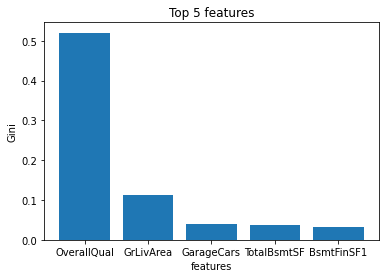

In [64]:
plt.title("Top 5 features")
plt.xlabel("features")
plt.ylabel("Gini")
plt.bar(imp.sort_values(ascending=False).head(5).index, imp.sort_values(ascending=False).head(5))

### Stecking

In [73]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


In [74]:
# Create Stacking 
Regressor = StackingRegressor(
    [
        ("LinearRegression", LinearRegression()),
        ("KNeighborsClassifier", KNeighborsRegressor()),
        ("DecisionTree", DecisionTreeRegressor())
    ], RidgeCV()
)

In [75]:
Regressor.fit(X_train, y_train)

StackingRegressor(estimators=[('LinearRegression', LinearRegression()),
                              ('KNeighborsClassifier', KNeighborsRegressor()),
                              ('DecisionTree', DecisionTreeRegressor())],
                  final_estimator=RidgeCV(alphas=array([ 0.1,  1. , 10. ])))

In [76]:
Regressor.score(X_train, y_train)

0.9485260544504358

In [77]:
Regressor.score(X_test, y_test)

0.8662326920620793

In [80]:
for i in Regressor.named_estimators:
    print(f'Score on train with model {i} {Regressor.named_estimators_[i].score(X_train, y_train)}')
    print(f'Score on test with model {i} {Regressor.named_estimators_[i].score(X_test, y_test)}')    

Score on train with model LinearRegression 0.9079379526492627
Score on test with model LinearRegression 0.8506491185995382
Score on train with model KNeighborsClassifier 0.7645798061576383
Score on test with model KNeighborsClassifier 0.6688254651579759
Score on train with model DecisionTree 1.0
Score on test with model DecisionTree 0.7313229913823417
